# Equilibrium and Present Values

<div align="right"><button><a href="https://colab.research.google.com/github/QuantEcon/workshop.africa-july2023/blob/main/day-05/exercise_set_5_with_solution.ipynb"><img src="" heght="10px"/><img
  src="https://colab.research.google.com/assets/colab-badge.svg"
  alt="open with Colab" width="100px"/></a></button></div>

#### Written for the QuantEcon Africa Workshop (July 2023)
#### Author: [John Stachurski](http://johnstachurski.net/), [Frank](https://github.com/chappiewuzefan) and [Shu Hu](https://shu-hu.com/)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import newton


### Exercise 1 (Numpy)

Read the section [NumPy Arrays](https://python-programming.quantecon.org/numpy.html#numpy-arrays) before you attempt the following exercises.

#### Exercise 1.1

Create a zero numpy array with dimension ``(10, )`` and ``dtype`` to ``np.float32``.

Assign this array to a global variable called ``a``.

### Solution

In [2]:
a = np.zeros(10, dtype=np.float32)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Exercise 1.2

Inspect the dimension of the array created in Exercise 1.1.

### Solution

In [3]:
a.shape

(10,)

#### Exercise 1.3

Use ``np.linspace`` to create a same array as in Exercise 1.1.

Assign this array to a global variable called ``b``.

### Solution

In [4]:
b = np.linspace(0, 0, 10, dtype=np.float32)
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Exercise 1.4

Replace the third element of variable ``b`` with $10$.


### Solution

In [5]:
b[2] = 10
b

array([ 0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

#### Exercise 1.5

Sort the new ``b`` from Exercise 1.4.

Compute its sum, mean, max, argmax, cumulative sum, cumulative product, variance, and standard deviation.

### Solution

In [6]:
b.sort()
b

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.], dtype=float32)

In [7]:
b.sum()

10.0

In [8]:
b.mean()

1.0

In [9]:
b.max()

10.0

In [10]:
b.argmax()

9

In [11]:
b.cumsum()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.], dtype=float32)

In [12]:
b.cumprod()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
b.var()

9.0

In [14]:
b.std()

3.0

#### Exercise 1.6

Find the index of the first element of the new ``b`` from Exercise 1.4 that is ``>= 5``.

### Solution

In [15]:
b.searchsorted(5, side='right')

9

### Exercise 2

Read the sections [Arithmetic Operations](https://python-programming.quantecon.org/numpy.html#arithmetic-operations) to [Mutability and Copying Arrays](https://python-programming.quantecon.org/numpy.html#mutability-and-copying-arrays) before you attempt the following exercises.

- element-wise arithmetic operations
- matrix multiplication
- mutability using index
- copying using .copy
- broadcasting

Given the following arrays

In [16]:
C = 3 * np.ones((3, 3)) 
D = np.ones((3, 3)) 

#### Exercise 2.1

Perform the operations `+`, `-`, `*`, `/` between ``C`` and ``D``.

Assign the value of the sum to a global variable called ``E``.

### Solution

In [17]:
E = C + D
E

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [18]:
C - D

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [19]:
C * D

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [20]:
C / D

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### Exercise 2.2

Perform the operation ``**`` on ``E`` with a power $5$.

Assign the value after the power operation to a global variable called ``F``.

### Solution

In [21]:
F = E ** 5
F

array([[32., 32., 32.],
       [32., 32., 32.],
       [32., 32., 32.]])

#### Exercise 2.3

Compute the matrix multiplication between ``E`` and ``F``.

Assign the value after the matrix multiplication to a global variable called ``G``.

### Solution

In [22]:
G = E @ F
G

array([[192., 192., 192.],
       [192., 192., 192.],
       [192., 192., 192.]])

#### Exercise 2.4

Change the element in the second row and third column of ``G`` to $100$.

### Solution

In [23]:
G[1, 2] = 100
G

array([[192., 192., 192.],
       [192., 192., 100.],
       [192., 192., 192.]])

#### Exercise 2.5

Copy the array from Exercise 2.4 to a new global variable called ``H``.

### Solution

In [24]:
H = np.copy(G)
H

array([[192., 192., 192.],
       [192., 192., 100.],
       [192., 192., 192.]])

### Exercise 3

Read the section [Roots and Fixed Points](https://python-programming.quantecon.org/scipy.html#roots-and-fixed-points) before you attempt the following exercises.

#### Exercise 3.1

Plot the following function $f$ on $[-5, 0]$:
$$
    f(x) = 5 ( \sin x - \frac{1}{5}) + x^{2} + x^{3} +20
$$

### Solution

In [25]:
def f(x): return 5 * (np.sin(x) - 1/5) + x**2 + x**3 + 20

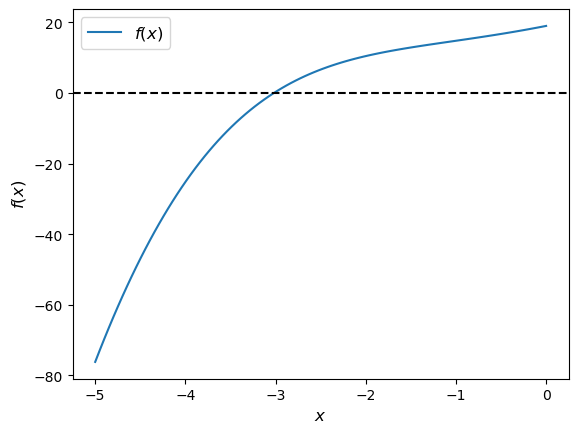

In [26]:
x = np.linspace(-5, 0, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$')
ax.axhline(ls='--', c='k')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

#### Exercise 3.2

Read the section [bisection](https://python-programming.quantecon.org/scipy.html#bisection).

Use the bisection function from ``SciPy`` to find the root for the function $f$ defined in Exercise 3.1.

### Solution

In [27]:
sp.optimize.bisect(f, -5, 0)

-3.0181843977049994

#### Exercise 3.3

Read the section [The Newton-Raphson Method](https://python-programming.quantecon.org/scipy.html#the-newton-raphson-method).

With different initial conditions $x=0, -2.5, -5$, 

try to use the newton function from ``SciPy`` to find the root for the function $f$ defined in Exercise 3.1.

### Solution

In [28]:
sp.optimize.newton(f, 0)

-3.0181843977045615

In [29]:
sp.optimize.newton(f, -2.5)

-3.018184397704561

In [30]:
sp.optimize.newton(f, -5)

-3.0181843977046117

#### Exercise 3.4

Read the section [Hybrid Methods](https://python-programming.quantecon.org/scipy.html#hybrid-methods).

Find the root for the function $f$ defined in Exercise 3.1 using the brentq function from ``SciPy``

### Solution

In [31]:
sp.optimize.brentq(f, -5, 0)

-3.018184397704561

#### Exercise 3.5

Read the section [Fixed Points](https://python-programming.quantecon.org/scipy.html#fixed-points).

With different initial guesses $x=-5, -2.5, 0$,

Find the root for the function $f$ defined in Exercise 3.1 using the fixed point function from ``SciPy``

### Solution

In [32]:
sp.optimize.fixed_point(f, -5)

array(-3.19802694)

In [33]:
sp.optimize.fixed_point(f, -2.5)

array(-3.19802694)

In [34]:
sp.optimize.fixed_point(f, 0)

array(-3.19802694)

#### Exercise 3.6

Read the section [Optimization](https://python-programming.quantecon.org/scipy.html#optimization).

Use functions from ``SciPy`` to find the maximizer and minimizer of the function $f$ defined in Exercise 3.1 over domain $D = [-5, 0]$.

### Solution

In [35]:
sp.optimize.minimize_scalar(f, bounds=(-5, 0))

-4.999996371653228

In [36]:
g = lambda x: f(-x)

In [37]:
sp.optimize.minimize_scalar(g, bounds=(-5, 0))

-4.812673350935262e-06

#### Exercise 3.7

Read the section [Integration](https://python-programming.quantecon.org/scipy.html#integration).

Use functions from ``SciPy`` to find the integral for the function $f$ defined in Exercise 3.1 over domain $D = [-5, 0]$.

### Solution

In [38]:
integral, _ = sp.integrate.quad(f, -5, 0)
integral

-23.16502240601722

### Exercise 4 (Present Value)

#### Exercise 4.1: Computing Present Value

Imagine you have the opportunity to receive $500 two years from now. If the annual discount rate is 5%, what is the present value of this future cash flow?

*Hint: Use the formula of [present value](https://en.wikipedia.org/wiki/Present_value).*

### Solution

In [39]:
def present_value(FV, r, n):
    PV = FV / (1 + r)**n
    return round(PV, 2)

In [40]:
try:
    assert abs(present_value(500, 0.05, 2) - 453.51) < 1e-2
    print("Test passed!")
except AssertionError:
    print("Test failed.")
except Exception as e:
    print(f"An error occurred during testing: {e}")

Test passed!


#### Exercise 4.2: Evaluating a Series of Future Cash Flows

Suppose you are evaluating an investment that promises to pay $1000 at the end of each year for the next five years. If your discount rate is still 5% per annum, what is the present value of these future cash flows?

*Hint: In this case, you will have to sum the present values of each future cash flow.*

### Solution

In [41]:
def present_value_series(annual_cash_flow, r, years):
    result = sum([annual_cash_flow / (1 + r)**n for n in years])
    return round(result, 2)

In [42]:
try:
    assert abs(present_value_series(1000, 0.05, range(1, 6)) - 4329.48) < 1e-2
    print("Test passed!")
except AssertionError:
    print("Test failed.")
except Exception as e:
    print(f"An error occurred during testing: {e}")

Test passed!


#### Exercise 4.3: Asset Pricing Using the Present Value Model

Consider a stock that is expected to pay dividends of $100$ at the end of each year for the next three years, after which point it is expected to be sold for $1500$. If the annual discount rate is 6%, calculate:

1. The present value of the dividends.
2. The present value of the terminal price of the stock.
3. The total present value of the stock (which should be equal to its current price).

*Hint: Use the same method as in the second exercise for the dividends, and the method from the first exercise for the terminal price.*

### Solution

In [43]:
def calculate_stock_value(dividend, terminal_price, r, years):
    dividend = 100
    terminal_price = 1500
    r = 0.06
    years = range(1, 4)  # from 1 to 3 inclusive
    PV_dividends = sum([dividend / (1 + r)**n for n in years])
    PV_terminal = terminal_price / (1 + r)**3
    PV_total = PV_dividends + PV_terminal
    return round(PV_dividends, 2), round(PV_terminal, 2), round(PV_total, 2)

In [44]:
try:
    PV_dividends, PV_terminal, PV_total = calculate_stock_value(100, 1500, 0.06, range(1, 4))
    assert abs(PV_dividends - 267.3) < 1e-2
    assert abs(PV_terminal - 1259.43) < 1e-2
    assert abs(PV_total - 1526.73) < 1e-2
    print("Test passed!")
except AssertionError:
    print("Test failed.")
except Exception as e:
    print(f"An error occurred during testing: {e}")

Test passed!


#### Exercise 4.4: Matrix Multiplication in Asset Pricing

Consider an asset that is expected to yield dividends of $100$ at the end of each year for the next five years, after which point it is predicted to be sold for $2000$. The annual discount rate is set to be 5%. Your task is to compute:

1. The present value of the dividends using matrix multiplication.
2. The present value of the final price of the asset.
3. The total present value of the asset (which should be equal to its current price).

*Hint: Use matrix multiplication to solve for the present value of dividends, and use the same method as in the previous exercise for the final price.*

### Solution

In [45]:
def calculate_asset_value(dividend, final_price, discount_rate, years):
    dividend = np.array([100]*5)
    final_price = 2000
    discount_rate = 0.05
    years = np.array(range(1, 6))  # from 1 to 5 inclusive
    
    # Create a discount factor matrix
    discount_matrix = 1 / (1 + discount_rate) ** years

    # Calculate the present value of dividends using matrix multiplication
    PV_dividends = np.dot(dividend, discount_matrix)

    # Calculate the present value of the final price
    PV_final_price = final_price * (1 / (1 + discount_rate) ** years[-1])

    # Calculate the total present value
    PV_total = PV_dividends + PV_final_price

    return round(PV_dividends, 2), round(PV_final_price, 2), round(PV_total, 2)

In [46]:
try:
    PV_dividends, PV_final_price, PV_total = calculate_asset_value(100, 2000, 0.05, range(1, 6))
    assert abs(PV_dividends - 432.95) < 1e-2
    assert abs(PV_final_price - 1567.05) < 1e-2
    assert abs(PV_total - 2000.0) < 1e-2
    print("Test passed!")
except AssertionError:
    print("Test failed.")
except Exception as e:
    print(f"An error occurred during testing: {e}")

Test passed!


### Exercise 5

Read section [present value calculation](https://intro.quantecon.org/pv.html#present-value-calculations) before attempting exercises 6.1 and 6.1.

Let $A, p, d, b$ be as defined in that section.

So we have

$$
    A p = d + b
$$

#### Exercise 5.1: Price of a worthless stock

Compute and plot the corresponding asset price sequence when $T=6$, $p^*_{T+1} = 0$, $d_t=0$ and $\delta
= 0.98$.

### Solution

In [47]:
T = 6
p_star = 0.0
δ = 0.98

In [48]:
d = np.zeros(T+1)
A = np.zeros((T+1, T+1))
for i in range(T+1):
    for j in range(T+1):
        if i == j:
            A[i, j] = 1
            if j < T:
                A[i, j+1] = -δ

b = np.zeros(T+1)
b[-1] = δ * p_star
p = np.linalg.solve(A, d + b)

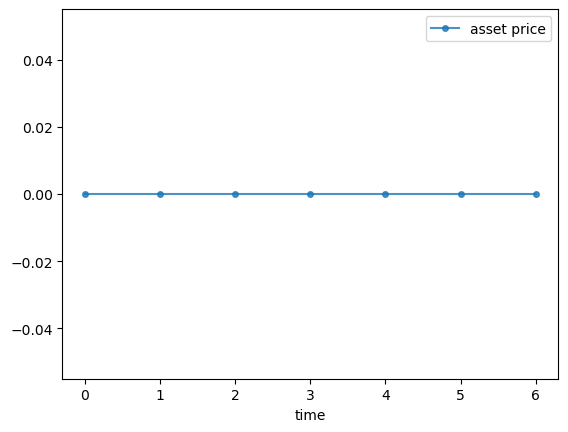

In [49]:
fig, ax = plt.subplots()
ax.plot(p, 'o-', ms=4, alpha=0.8, label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()

#### Exercise 5.2: Gorden growth formula

Let $\delta$ be the same as Exercise 5.1.

Compute and plot the corresponding asset price sequence when $T=100$, $p^*_{T+1} = g^{T+1} d_0$ and $d_t=g^t d_0$
where $g=1.1$ and $d_0=0.1$.

### Solution

In [50]:
T = 100
δ = 0.98
g = 1.1
current_d = 0.1 # d_0

In [51]:
p_star = g**(T+1) * current_d

d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.1**t 

In [52]:
A = np.zeros((T+1, T+1))
for i in range(T+1):
    for j in range(T+1):
        if i == j:
            A[i, j] = 1
            if j < T:
                A[i, j+1] = -δ

b = np.zeros(T+1)
b[-1] = δ * p_star
p = np.linalg.solve(A, d + b)

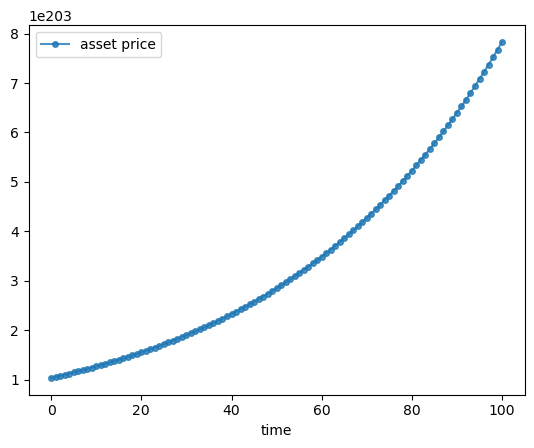

In [53]:
fig, ax = plt.subplots()
ax.plot(p, 'o-', ms=4, alpha=0.8, label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()

#### Exercise 5.3: Analytical expressions

Read section [analytical expressions](https://intro.quantecon.org/pv.html#analytical-expressions).

Give analytical expressions for the asset price $p_t$ in Exercise 5.2.

### Solution

$$
   p_t =  \sum_{s=t}^T \delta^{s-t} g^s d_0 +  \delta^{T+1-t} g^{T+1} d_0
$$
